In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, classification_report, f1_score, recall_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import string
from string import punctuation
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import seaborn as sns


In [3]:
df = pd.read_csv('rzcsvfinal.csv')

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Msg     2227 non-null   object
 1   Label   2227 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Msg     2227 non-null   object
 1   Label   2227 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
df.shape

(2227, 2)

In [7]:
df
df.duplicated().sum()

192

In [8]:
df= df.drop_duplicates(keep='first')

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(2035, 2)

In [11]:
df['Label'] = df['Label'].replace('ham', 0, regex=True)
df['Label'] = df['Label'].replace('spam', 1, regex=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2740\1490684405.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace('spam', 1, regex=True)


In [12]:
df

,Msg,Label
0,CONGRATULATIONS! FREE 2GB data is yours! \nCla...,1
1,Hi! Thank you for being with Vi-India's FASTES...,1
2,"As part of Cyber Swachhta Pakhwada, CERT-In Go...",1
3,I will try to manage took tablets,0
4,Study from Home with Vi!! Watch Kite Victers C...,1
...,...,...
2222,Will join in 10 mins,0
2223,"Enjoy unlimited Local, STD & Roaming calls on ...",1
2224,Will fix it and join asap,0
2225,Exclusive offer for you! 1) 30 Day free with A...,1


In [13]:
print(df.columns)

Index(['Msg', 'Label'], dtype='object')


In [14]:
df['Label'].value_counts()

Label
0    1330
1     705
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

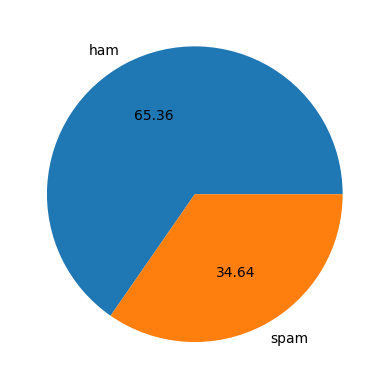

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(), labels= [ 'ham','spam'] , autopct="%0.2f")
plt.show

In [16]:
df['num_characters'] = df ['Msg'].apply(len)
df.head()

,Msg,Label,num_characters
0,CONGRATULATIONS! FREE 2GB data is yours! \nCla...,1,104
1,Hi! Thank you for being with Vi-India's FASTES...,1,151
2,"As part of Cyber Swachhta Pakhwada, CERT-In Go...",1,145
3,I will try to manage took tablets,0,34
4,Study from Home with Vi!! Watch Kite Victers C...,1,140


In [17]:
# number of words in the SMS

df['num_words'] = df['Msg'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

df['num_sentences'] = df['Msg'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Msg,Label,num_characters,num_words,num_sentences
0,CONGRATULATIONS! FREE 2GB data is yours! \nCla...,1,104,17,4
1,Hi! Thank you for being with Vi-India's FASTES...,1,151,30,4
2,"As part of Cyber Swachhta Pakhwada, CERT-In Go...",1,145,27,2
3,I will try to manage took tablets,0,34,7,1
4,Study from Home with Vi!! Watch Kite Victers C...,1,140,28,4


In [18]:
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [19]:
def transform_Msg(Msg):
    Msg=Msg.lower()
    Msg = nltk.word_tokenize(Msg)

    y = []
    for i in Msg:
        if i.isalnum():
            y.append(i)

    Msg = y[:] 
    y.clear()

    for i in Msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    Msg = y[:]
    y.clear()

    for i in Msg:
        y.append(ps.stem(i))

    
    return " ".join(y)

In [20]:
transform_Msg("Is that seriously how you spell his name? ")


'serious spell name'

In [21]:
df['transformed_Msg'] = df['Msg'] .apply(transform_Msg)
df.head()

,Msg,Label,num_characters,num_words,num_sentences,transformed_Msg
0,CONGRATULATIONS! FREE 2GB data is yours! \nCla...,1,104,17,4,congratul free 2gb data claim airtel thank app...
1,Hi! Thank you for being with Vi-India's FASTES...,1,151,30,4,hi thank fastest 4g love improv click http sha...
2,"As part of Cyber Swachhta Pakhwada, CERT-In Go...",1,145,27,2,part cyber swachhta pakhwada goi advis keep di...
3,I will try to manage took tablets,0,34,7,1,tri manag took tablet
4,Study from Home with Vi!! Watch Kite Victers C...,1,140,28,4,studi home vi watch kite victer channel free m...


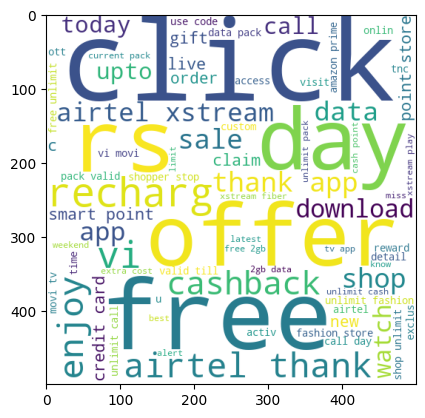

In [22]:
wc = WordCloud(width= 500,height =500,min_font_size=10 , background_color='white')
spam_wc = wc.generate (df[df['Label']==1]['transformed_Msg'].str.cat(sep=""))
plt.imshow(spam_wc)

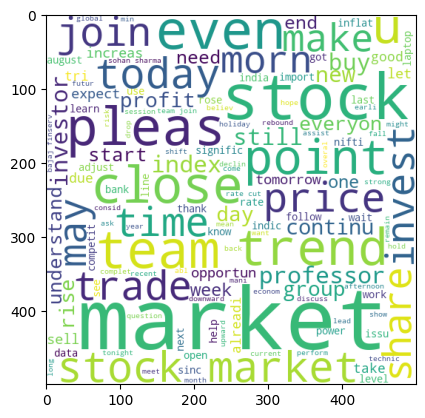

In [23]:
ham_wc = wc.generate (df[df['Label']==0]['transformed_Msg'].str.cat(sep=""))
plt.imshow(ham_wc)

In [24]:
spam_corpus = []
for msg in df[df['Label']== 1]['transformed_Msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

12096

In [25]:
spam_corpus = []
for msg in df[df['Label'] ==1]['transformed_Msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [26]:
len(spam_corpus)

12096

In [27]:
from collections import Counter
Counter(spam_corpus).most_common(20)

[('click', 409),
 ('get', 273),
 ('free', 247),
 ('airtel', 182),
 ('data', 170),
 ('offer', 164),
 ('http', 158),
 ('unlimit', 148),
 ('app', 146),
 ('rs', 139),
 ('call', 136),
 ('recharg', 123),
 ('day', 121),
 ('shop', 118),
 ('pack', 114),
 ('vi', 112),
 ('c', 109),
 ('store', 97),
 ('enjoy', 92),
 ('1', 87)]

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()
cv= CountVectorizer()
X = tfidf.fit_transform(df['transformed_Msg']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
X.shape

(2035, 3181)

In [30]:
y = df['Label'].values


In [31]:
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [32]:
X_train , X_test , y_train , y_test = train_test_split ( X ,y , test_size= 0.2 , random_state=2 )

In [33]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(2035, 3181)
(1628, 3181)
(407, 3181)


# NB

In [34]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [35]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [36]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.941031941031941
[[253  20]
 [  4 130]]
0.9701492537313433
0.8666666666666667
0.9154929577464789


In [37]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.9828009828009828
[[268   5]
 [  2 132]]
0.9850746268656716
0.9635036496350365
0.974169741697417


In [38]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.9926289926289926
[[273   0]
 [  3 131]]
1.0
0.9776119402985075
0.9886792452830189


In [39]:
print ( classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       273
           1       1.00      0.98      0.99       134

    accuracy                           0.99       407
   macro avg       0.99      0.99      0.99       407
weighted avg       0.99      0.99      0.99       407



In [40]:
cmbnb = confusion_matrix(y_test,y_pred1)
print("Confusion Matrix on Test Data:\n", confusion_matrix(y_test,y_pred1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.copper)
plt.title('Confusion Matrix for Bernoulli Naive Bayes Classifier')
plt.show()

Confusion Matrix on Test Data:
 [[273   0]
 [  3 131]]


NameError: name 'cm' is not defined

# Logistic Regression


In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:


y_pred2=model.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.972972972972973
[[273   0]
 [ 11 123]]
1.0
0.917910447761194
0.9571984435797666


In [ ]:
cm = confusion_matrix(y_test,y_pred2)
print("Confusion Matrix on Test Data:\n", confusion_matrix(y_test,y_pred2))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [ ]:
print ( classification_report(y_test, y_pred2))

# Ngram

In [46]:
ngram_vect = CountVectorizer(ngram_range=(1,2)) # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(df['transformed_Msg'])
print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

(2035, 15156)
['00' '00 daili' '04' ... 'zone' 'zone reddi' 'zwfqjnnnn']


In [47]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Fit and transform the text data
X1 = vectorizer.fit_transform(df['transformed_Msg'])

# Get feature names (n-grams)
feature_names = vectorizer.get_feature_names_out()

